<a href="https://colab.research.google.com/github/vikaatntr/PVCK_Genap_2021/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada Gamma
--------------------------------
Masukkan nilai kecerahan: 3


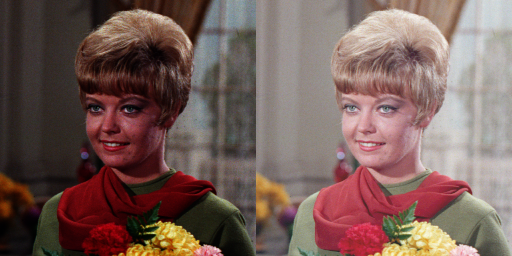

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Gamma Correction pada Gamma')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1/gamma)),0,255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth : 2


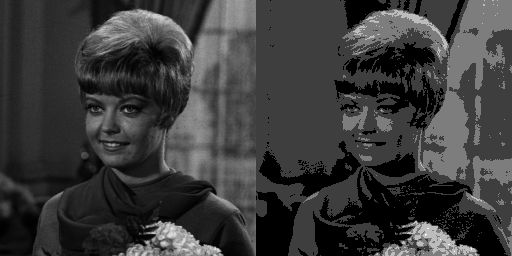

In [6]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 bit_depth = float(input('Masukkan nilai Bit Depth : '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
bit_depth_image = np.zeros(original.shape, original.dtype)

level = 255 / (2 ** bit_depth) - 1

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    #memasukkan rumus bit depth
     bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)
     
final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)


In [19]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noise/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(original, compressed): 
  first_image = original[0]
  for x in range(1, compressed):
    if (x == 0):
      continue
      first_image = first_image - original[x]
      # print [x]
    mse = np.mean((first_image) ** compressed) 
    # MSE nol berarti tidak ada noise dalam sinyal,dan jadinya PNSR menjadi tidak terlalu penting   
    if(mse == 0):     
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

print('PNSR')
print('-----------------------------------')
try :
  averageCitra = int(input('Masukkan Jumlah Citra Avarage : '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img, averageCitra)
print('Nilai PSNR : ')
print (result)

PNSR
-----------------------------------
Masukkan Jumlah Citra Avarage : 100


IndexError: ignored

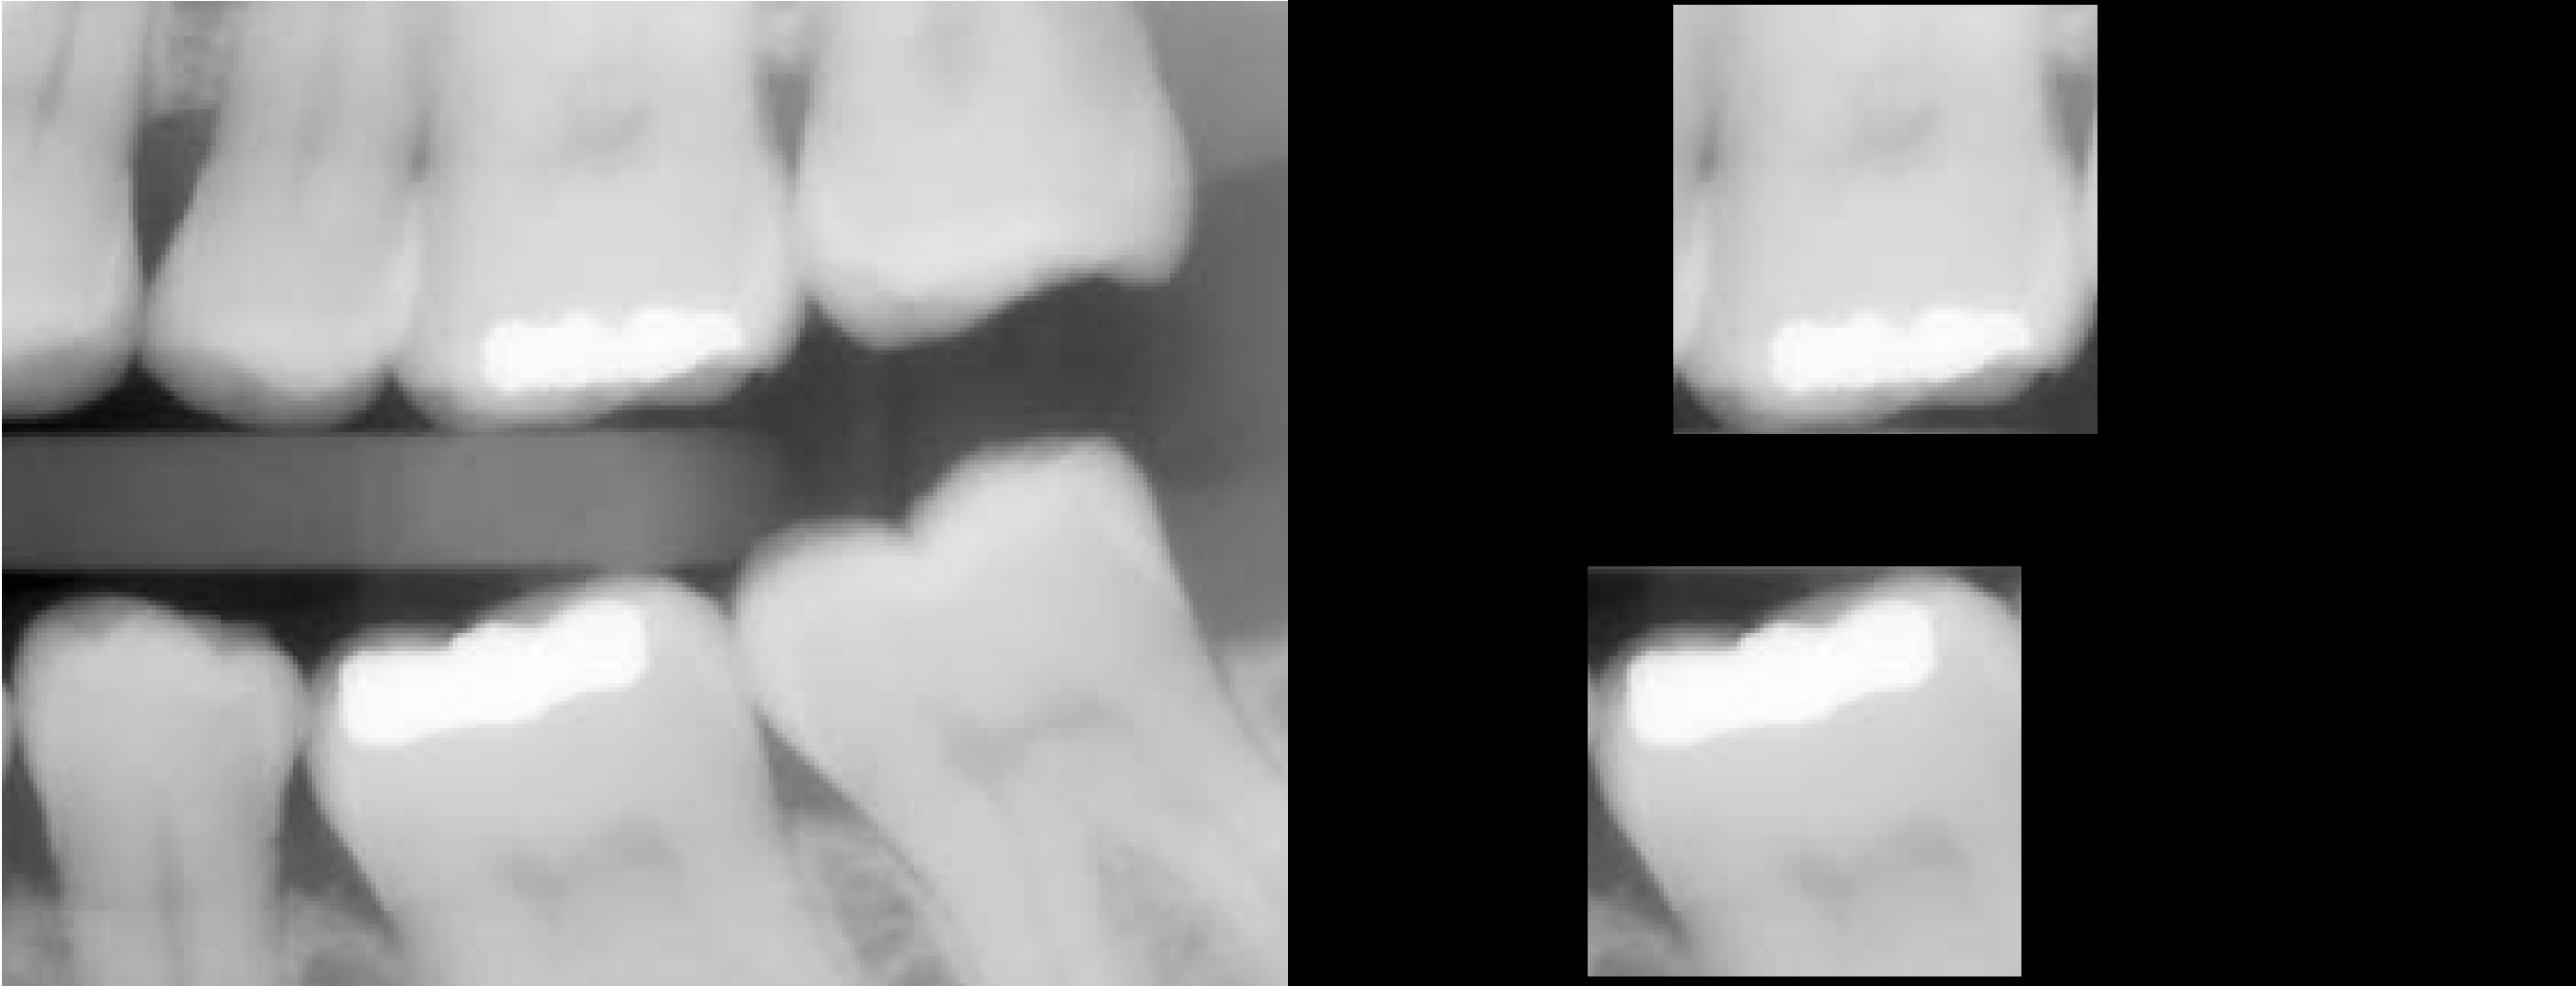

In [18]:
img = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

teeth_frame = cv.hconcat((img, result))
cv2_imshow(teeth_frame)

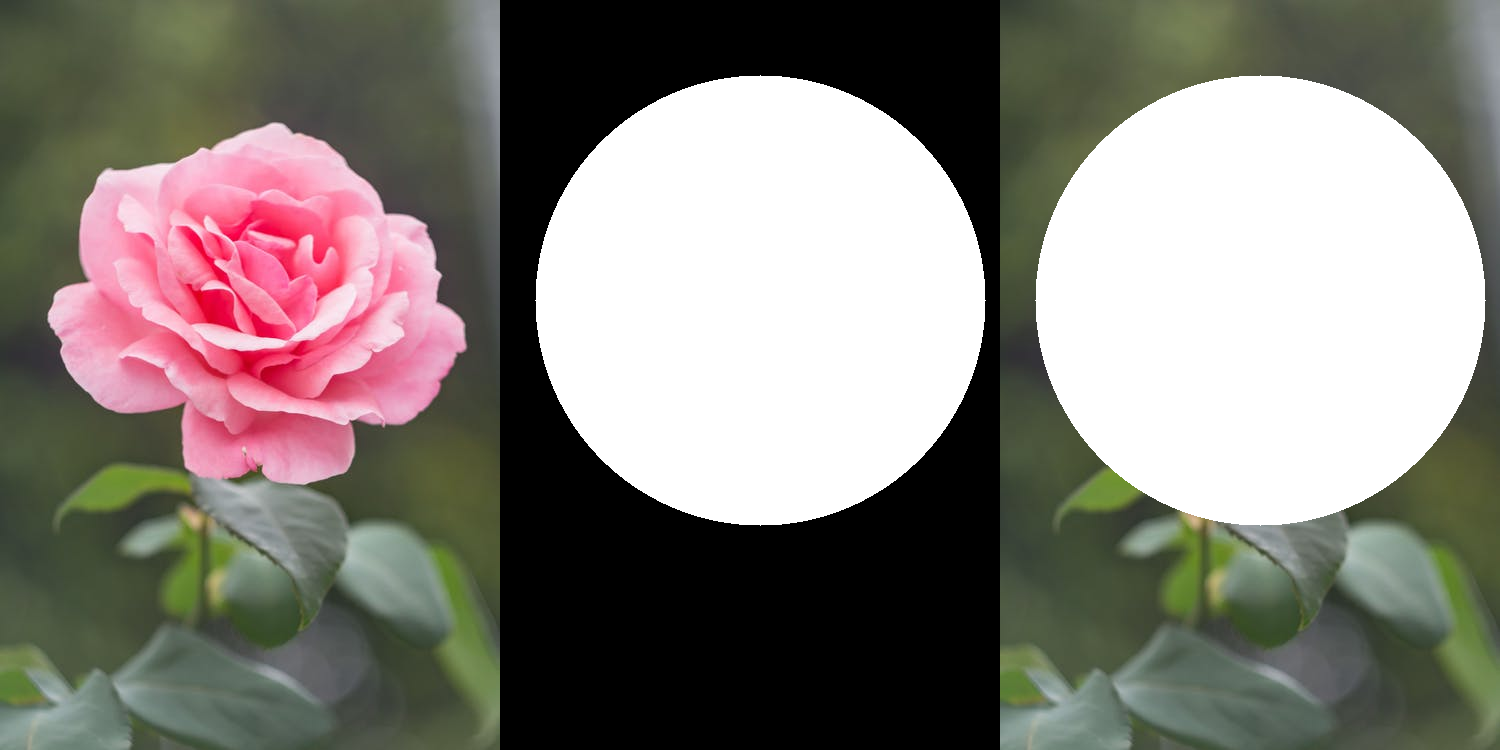

In [20]:
img_rose = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

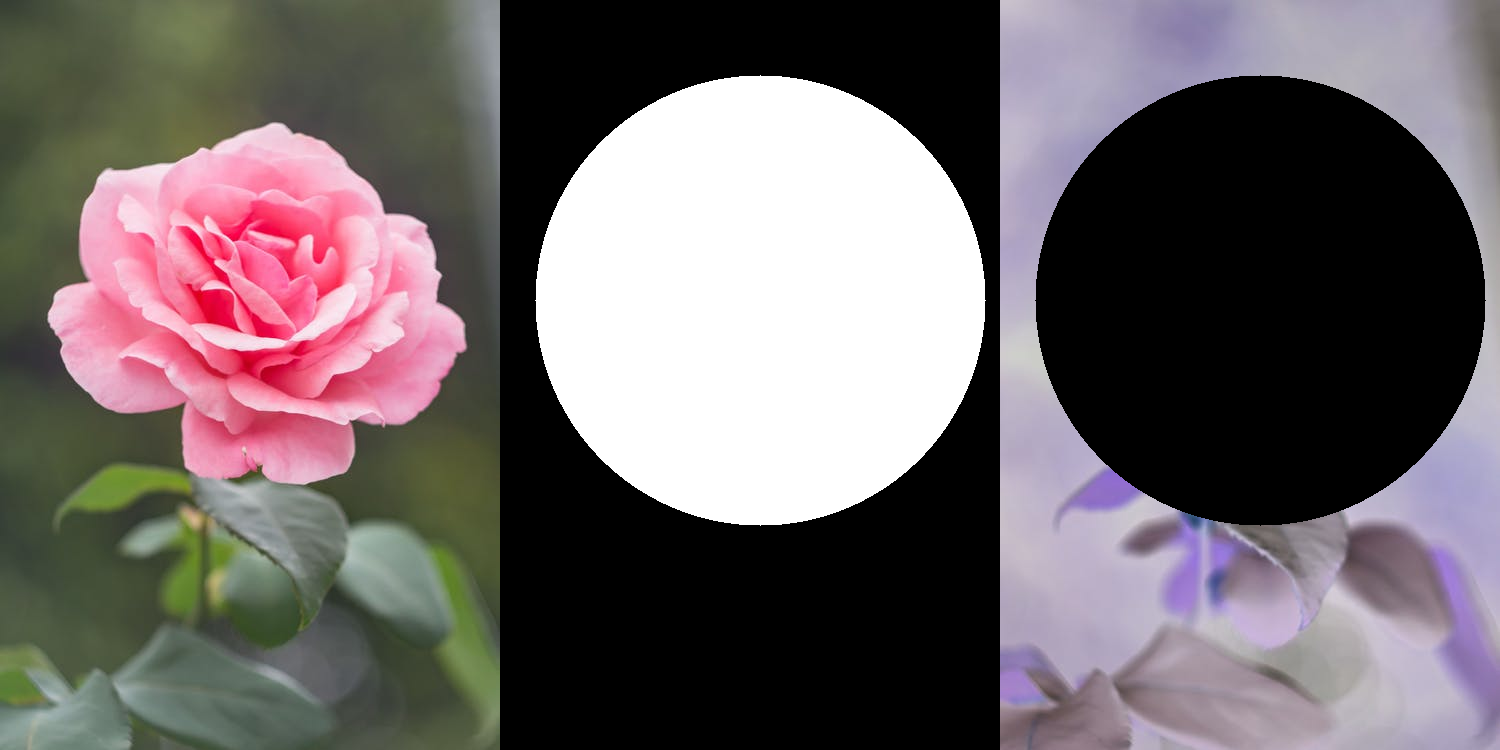

In [21]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

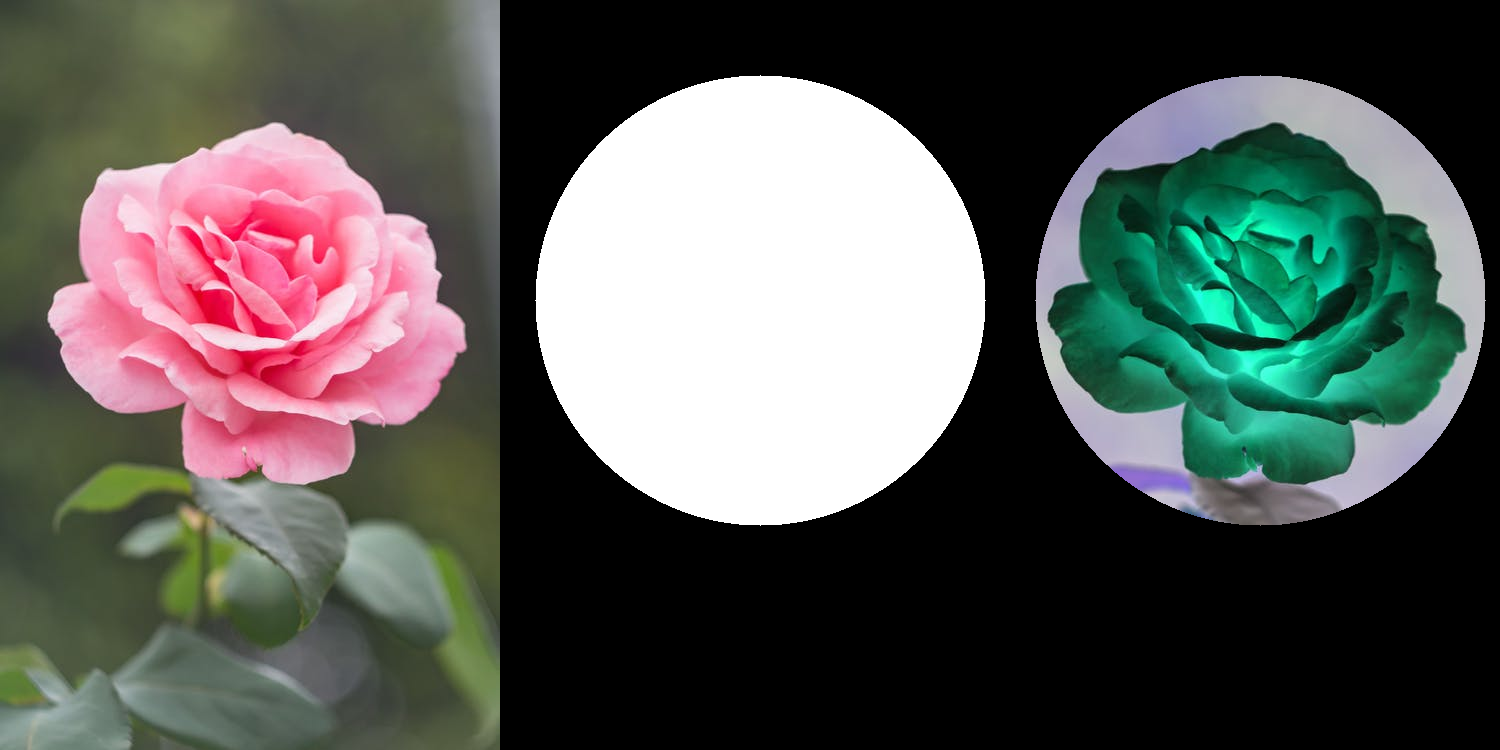

In [22]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask,masked)) 
cv2_imshow(rose_frame)

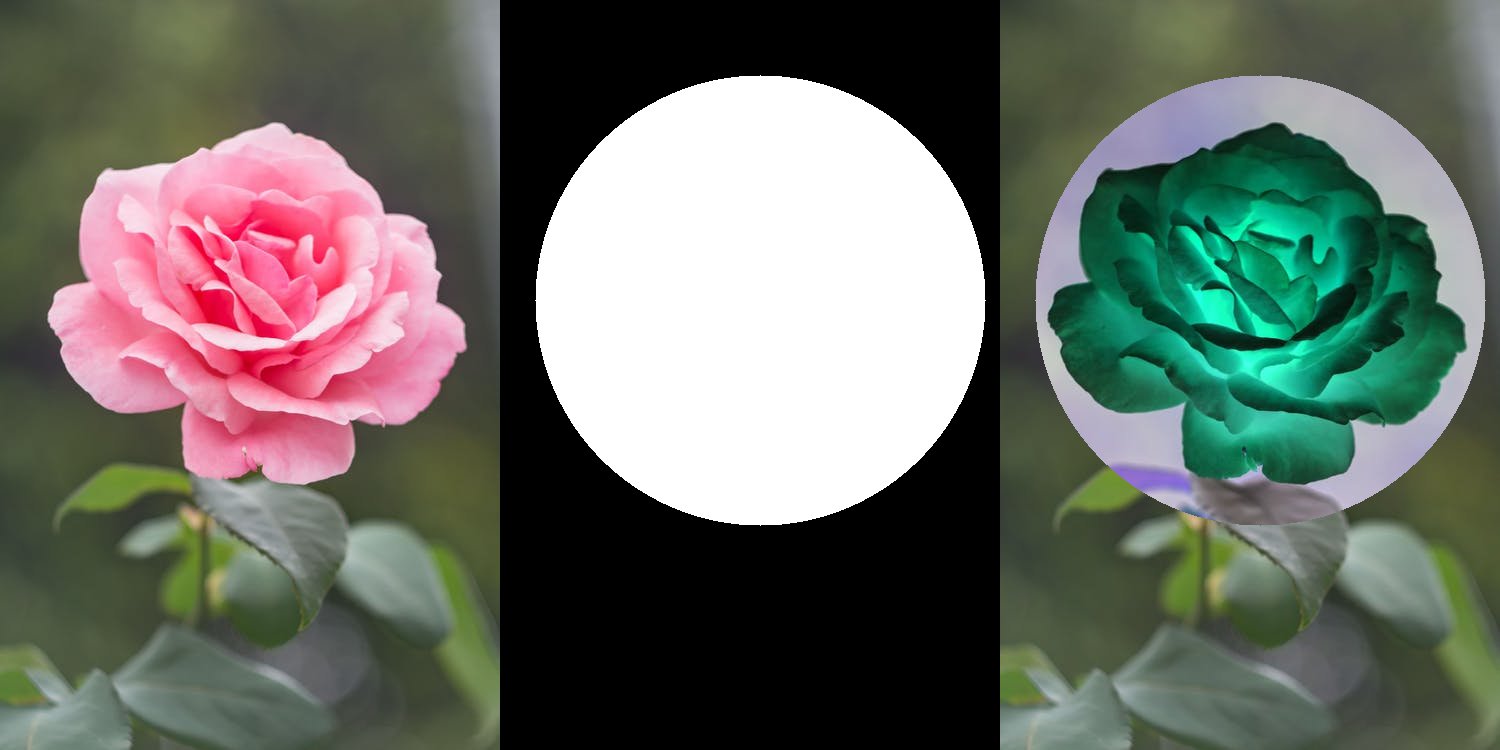

In [23]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask,masked)) 
cv2_imshow(rose_frame)